## Find missing data and process
This file aims to process the missing data and save the processed data as csv file

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# read raw data
model_sample = pd.read_csv("./data/model_sample.csv")
# dropout id it is user's id
model_sample = model_sample.drop('user_id', axis=1)

#### features missing rate

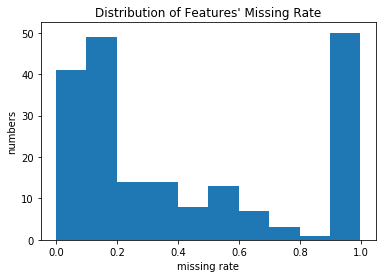

In [13]:
miss_rate = model_sample.isnull().sum()/len(model_sample)
plt.hist(miss_rate)
plt.title('Distribution of Features\' Missing Rate')
plt.xlabel('missing rate')
plt.ylabel('numbers')
plt.show()

In [14]:
# delete missing features whose missing rate are above 40%
miss_rate_list = miss_rate[(miss_rate > 0.4)] 
miss_delete_features = miss_rate_list.index
model_sample = model_sample.drop(miss_delete_features, axis=1) #delete some features
model_sample.tail()

,y,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,x_009,...,x_190,x_191,x_192,x_193,x_194,x_195,x_196,x_197,x_198,x_199
11012,0,0.0,29.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11013,1,0.0,25.0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,5.0,5.0,4.0,4.0,7.0,7.0
11014,0,0.0,28.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11015,0,0.0,23.0,0,0,0,0,0,0,0,...,1.0,0.0,3.0,1.0,5.0,1.0,3.0,1.0,7.0,1.0
11016,1,0.0,35.0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### look deep into the data

The [`missingno` library](https://github.com/ResidentMario/missingno), which I wrote expressly for this purpose, provides a few further useful expressions for a deeper look into this subject.
There are some useful method to visualize the data. These can be shown as follows:
* Matrix
* Heatmap
* Dendrogram


#### Matrix
The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

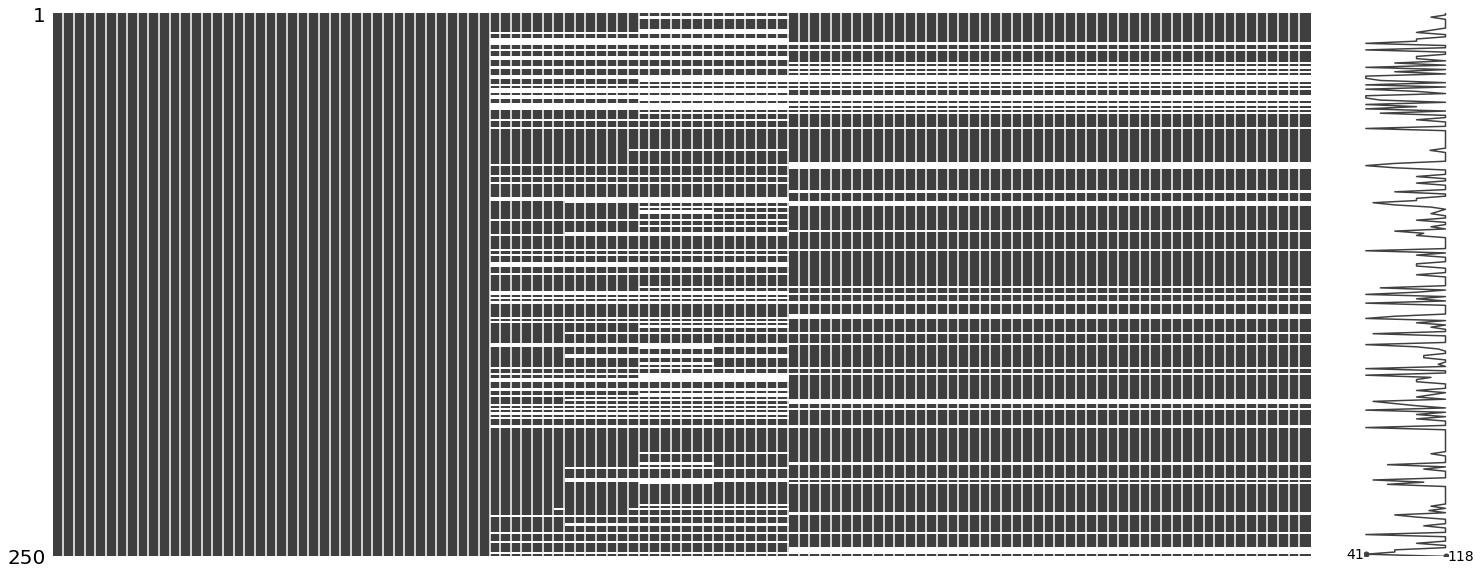

In [16]:
import missingno as msno
msno.matrix(model_sample.sample(250))
plt.show()

#### Heatmap

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

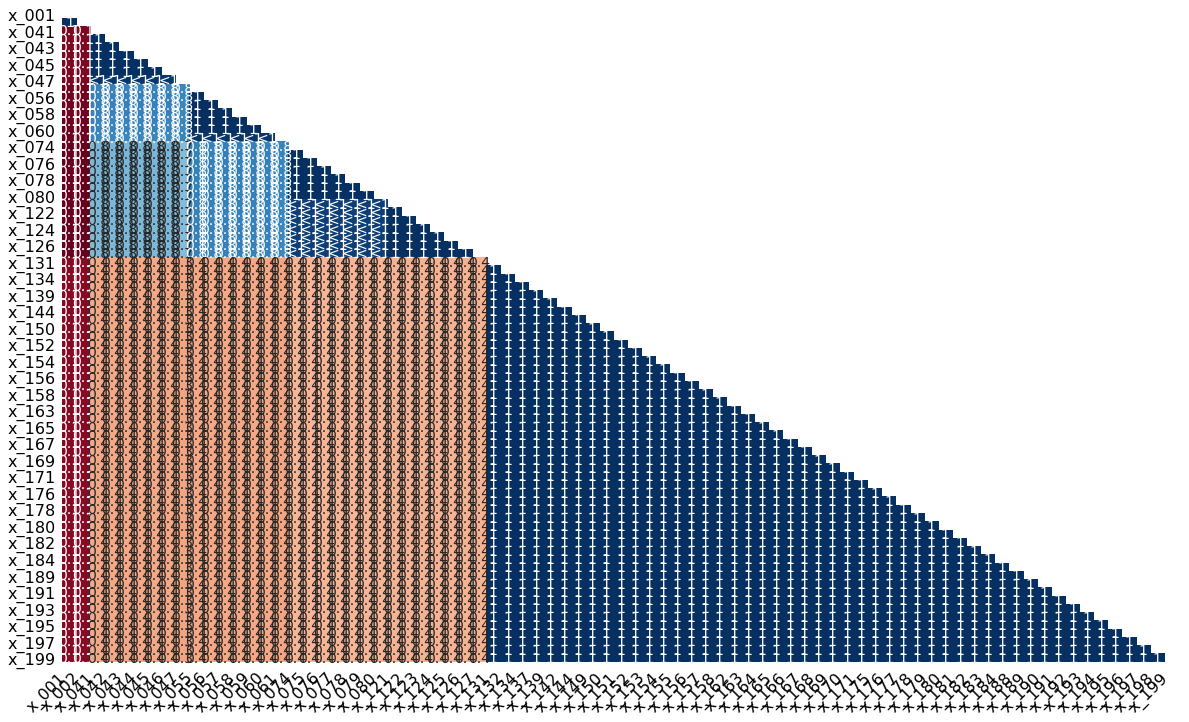

In [17]:
msno.heatmap(model_sample)
plt.show()

#### Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

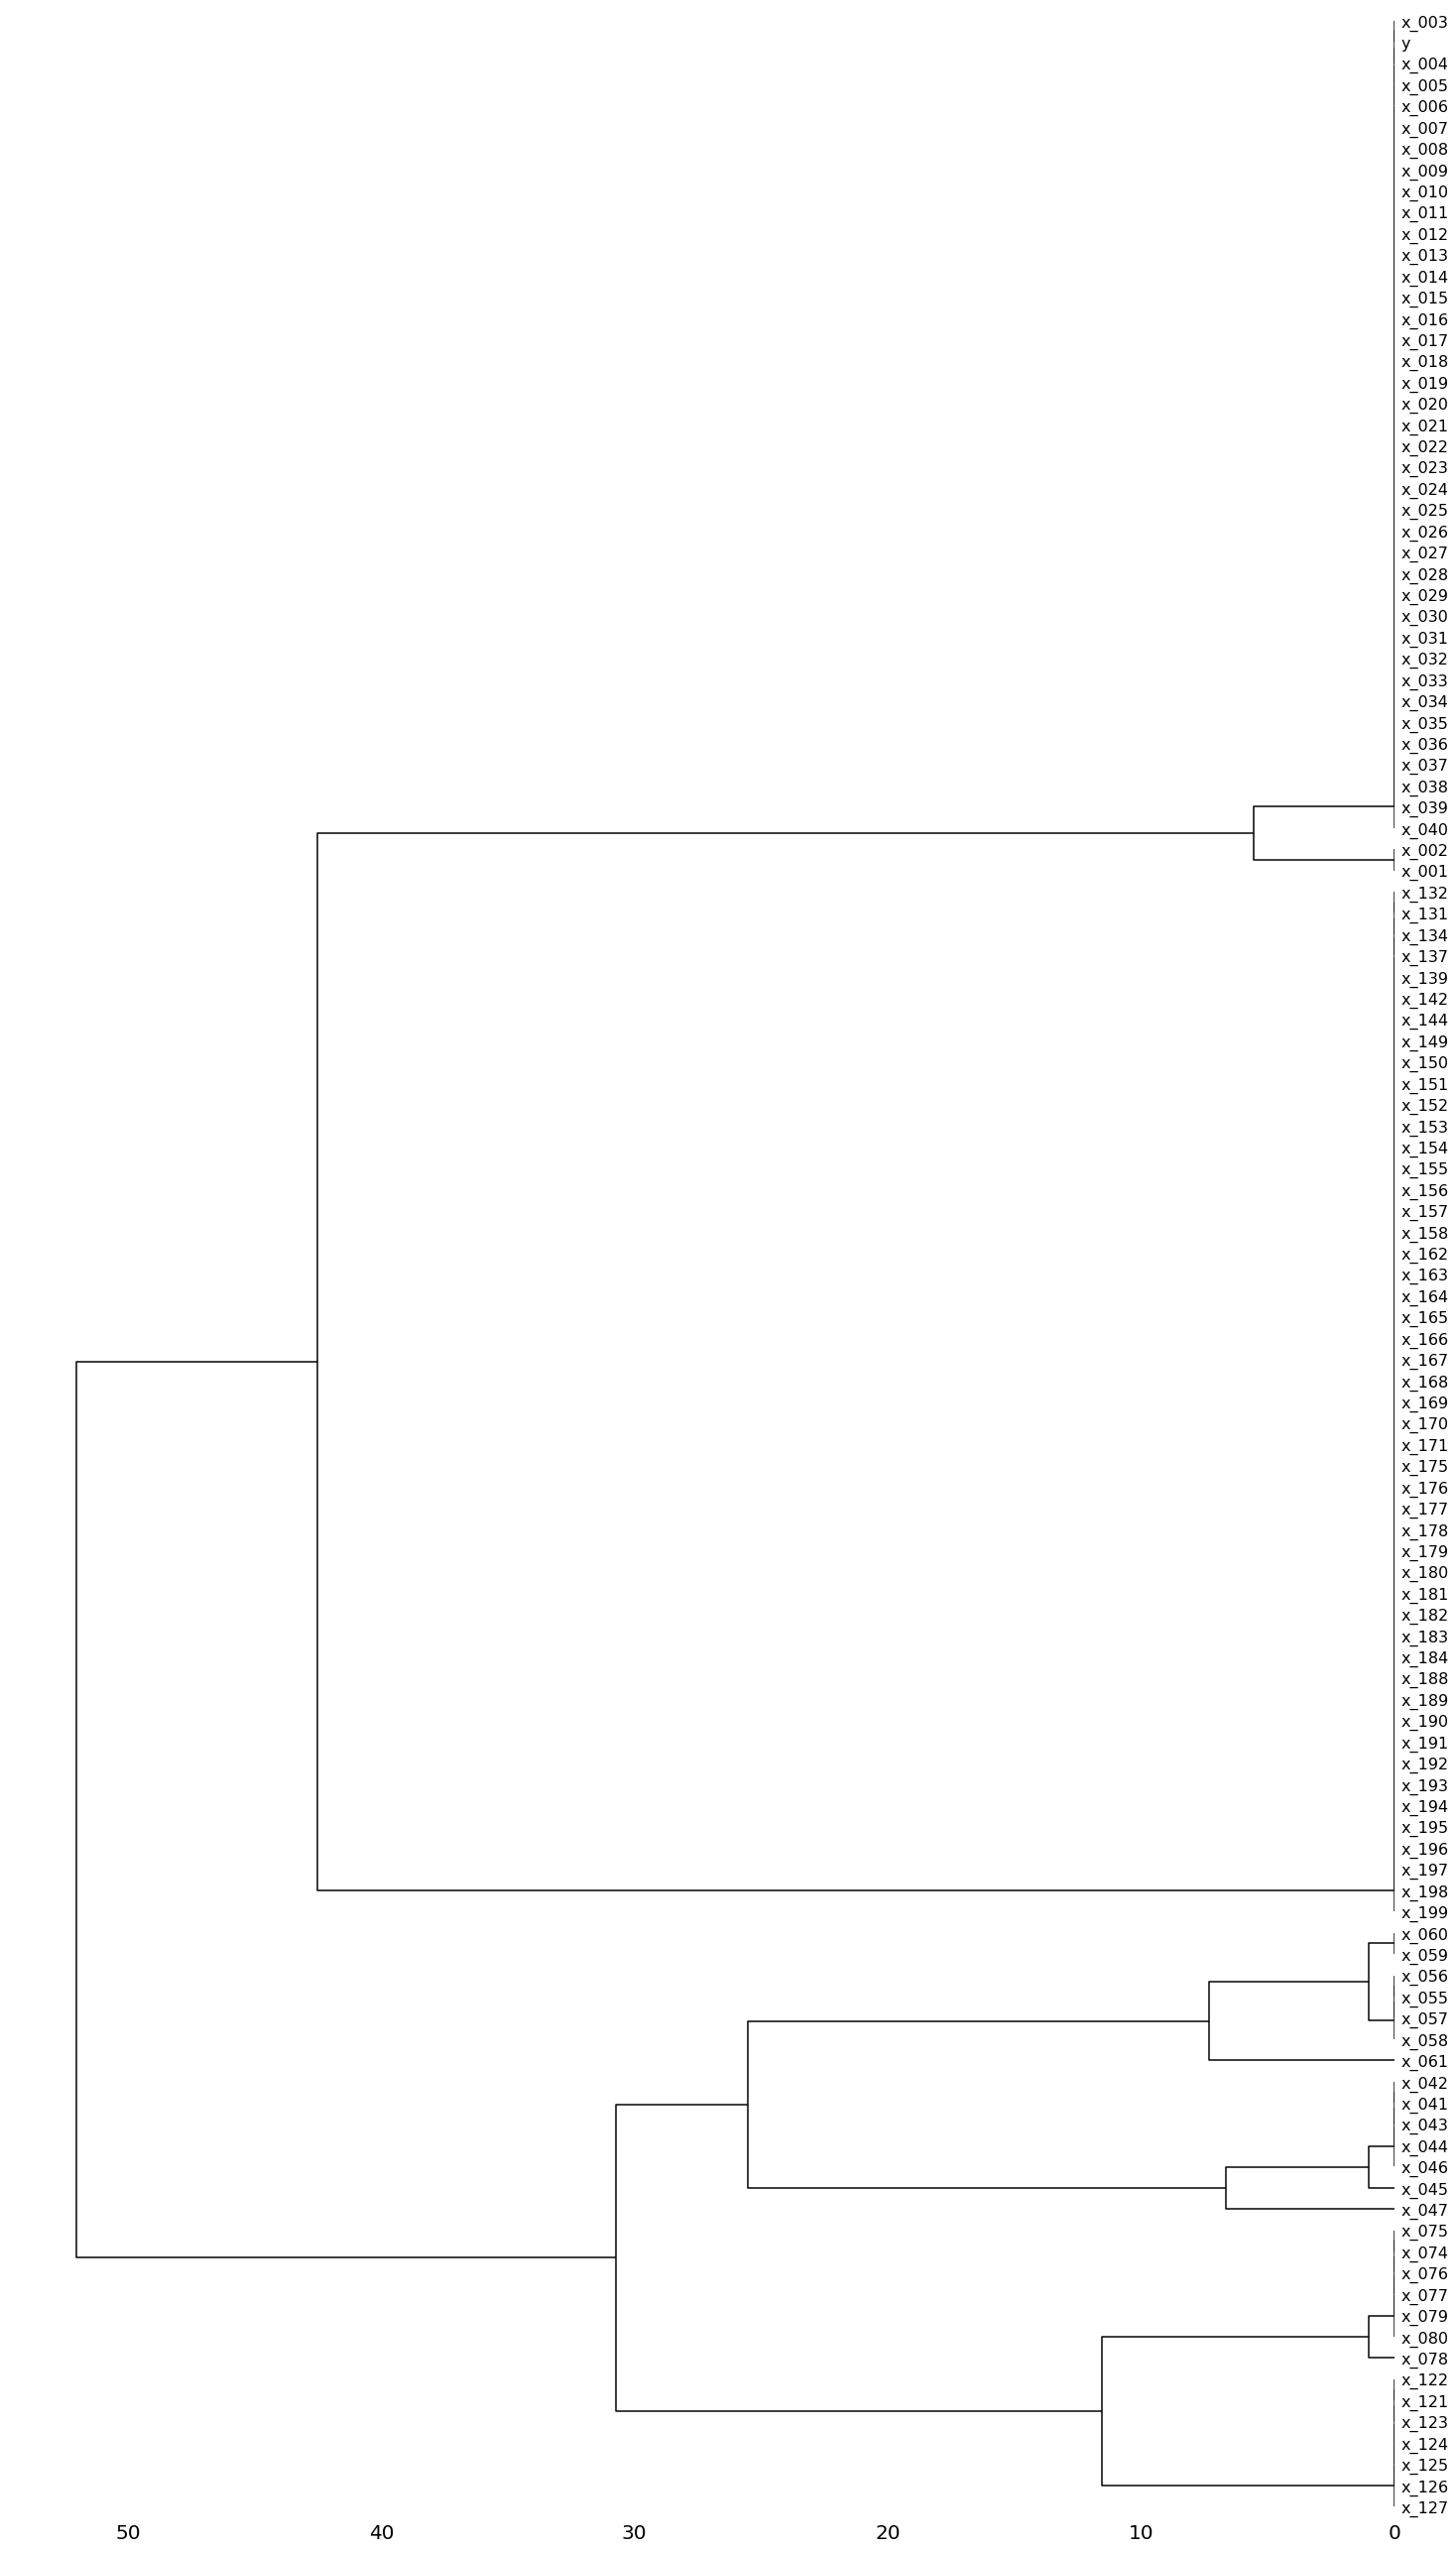

In [18]:
msno.dendrogram(model_sample)
plt.show()

### Conclusion
Missing data mechanisms can be categorized into three types
* missing completely at random (MCAR)
* missing at random (MAR)
* missing not at random (MNAR)

You can check more [missing data](https://en.wikipedia.org/wiki/Missing_data#Types_of_missing_data) from Wikipedia

From the above analysis, we can conclude the data belong to missing not at random (MNAR).That's to say,
I will use techniques related to MNAR to deal with missing data.

### Dealing with Missing Not at Random

* K-Nearest Neighbours
* Multivariate Imputation by Chained Equations
* Expectation Maximization
* Mean Imputation
* Median Imputation
* Random Imputation


[Impyute](https://github.com/eltonlaw/impyute) is a library of missing data imputation algorithms.
Data imputations library  to preprocess datasets with missing data. More infomation you can check the website http://impyute.readthedocs.io/


In [20]:
# impute the missing data (it takes a little long time to process)
import impyute as impy
ivalue = model_sample.values
imputed = impy.em(ivalue)

In [21]:
columns_name = model_sample.columns
imputed_sample = pd.DataFrame(imputed,columns=columns_name)
imputed_sample['y'] = imputed_sample['y'].astype(int)
imputed_sample.tail()

,y,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,x_009,...,x_190,x_191,x_192,x_193,x_194,x_195,x_196,x_197,x_198,x_199
11012,0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.497089,0.267522,-2.234988,-3.088873,3.946276,-3.930855,6.90574,2.63363,-9.291302,1.47624
11013,1,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,4.00000,4.00000,7.000000,7.00000
11014,0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000
11015,0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,3.00000,1.00000,7.000000,1.00000
11016,1,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000


In [116]:
# save the processed data
imputed_sample.to_csv('model_sample_nomissing.csv')